In [1]:
#importing libraries

import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import requests
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests

from bs4 import BeautifulSoup

!conda install scikit-learn --yes
!pip install -U numpy scipy scikit-learn --yes

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes

import folium
print ("Libraries imported")

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs: 
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.11.29         |           py37_0         145 KB

The following packages will be DOWNGRADED:

    ca-certificates: 2018.11.29-ha4d7672_0 conda-forge --> 2018.03.07-0     
    certifi:         2018.11.29-py37_1000  conda-forge --> 2018.11.29-py37_0
    conda:           4.5.11-py37_1000      conda-forge --> 4.5.11-py37_0    
    openssl:         1.0.2p-h470a237_1     conda-forge --> 1.0.2p-h1de35cc_0


certifi-2018.11.29   | 145 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [packag

## London Population Growth

In [2]:
#download data and read into a datafram
df_pop = pd.read_excel('https://data.london.gov.uk/download/global-city-population-estimates/604a6a6f-2162-4d6b-bcd0-bee051703de1/global-city-population-estimates.xls',
                      sheet_name='CITIES-OVER-300K')
print("Data downloaded and read into a dataframe")

Data downloaded and read into a dataframe


In [3]:
df_pop.head()

,Country Code,Country or area,City Code,Urban Agglomeration,Note,Latitude,Longitude,1950,1955,1960,...,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030
0,392,Japan,21671,Tokyo,325.0,35.689500,139.691710,11274.641,13712.679,16678.821,...,30303.794,32530.003,33586.573,34449.908,35621.544,36833.979,38001.018,38323.229,37875.951,37190.489
1,356,India,21228,Delhi,318.0,28.666670,77.216670,1369.369,1781.624,2282.962,...,7325.185,9725.885,12407.372,15732.304,18670.494,21935.142,25703.168,29347.622,32726.564,36060.100
2,156,China,20656,Shanghai,202.0,31.222220,121.458060,4300.942,5846.383,6819.634,...,6846.765,7823.028,10449.535,13958.981,16763.455,19979.977,23740.778,27137.316,29441.569,30750.671
3,76,Brazil,20287,São Paulo,NaN,-23.547500,-46.636110,2334.038,3043.828,3969.759,...,13394.815,14775.840,15913.473,17014.078,18288.134,19659.808,21066.245,22118.900,22899.066,23444.363
4,356,India,21206,Mumbai (Bombay),NaN,19.073975,72.880838,2857.359,3432.147,4060.373,...,10390.912,12436.423,14309.845,16366.787,17890.736,19421.983,21042.538,22838.483,25207.329,27796.555


In [4]:
#cleaning dataframe
df_pop2 = df_pop.drop(['Country Code', 'City Code', 'Note', 'Latitude', 'Longitude'], axis=1)
df_pop2.head()

,Country or area,Urban Agglomeration,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030
0,Japan,Tokyo,11274.641,13712.679,16678.821,20284.371,23297.503,26614.733,28548.512,30303.794,32530.003,33586.573,34449.908,35621.544,36833.979,38001.018,38323.229,37875.951,37190.489
1,India,Delhi,1369.369,1781.624,2282.962,2845.042,3530.693,4425.964,5558.481,7325.185,9725.885,12407.372,15732.304,18670.494,21935.142,25703.168,29347.622,32726.564,36060.100
2,China,Shanghai,4300.942,5846.383,6819.634,6428.131,6036.492,5626.640,5966.171,6846.765,7823.028,10449.535,13958.981,16763.455,19979.977,23740.778,27137.316,29441.569,30750.671
3,Brazil,São Paulo,2334.038,3043.828,3969.759,5494.150,7620.490,9614.016,12089.454,13394.815,14775.840,15913.473,17014.078,18288.134,19659.808,21066.245,22118.900,22899.066,23444.363
4,India,Mumbai (Bombay),2857.359,3432.147,4060.373,4853.571,5811.304,7081.960,8657.886,10390.912,12436.423,14309.845,16366.787,17890.736,19421.983,21042.538,22838.483,25207.329,27796.555


In [5]:
#renaming columns
df_pop2.rename (columns = {'Country or area':'Country', 'Urban Agglomeration': 'City'}, inplace=True)
df_pop2.head()

,Country,City,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030
0,Japan,Tokyo,11274.641,13712.679,16678.821,20284.371,23297.503,26614.733,28548.512,30303.794,32530.003,33586.573,34449.908,35621.544,36833.979,38001.018,38323.229,37875.951,37190.489
1,India,Delhi,1369.369,1781.624,2282.962,2845.042,3530.693,4425.964,5558.481,7325.185,9725.885,12407.372,15732.304,18670.494,21935.142,25703.168,29347.622,32726.564,36060.100
2,China,Shanghai,4300.942,5846.383,6819.634,6428.131,6036.492,5626.640,5966.171,6846.765,7823.028,10449.535,13958.981,16763.455,19979.977,23740.778,27137.316,29441.569,30750.671
3,Brazil,São Paulo,2334.038,3043.828,3969.759,5494.150,7620.490,9614.016,12089.454,13394.815,14775.840,15913.473,17014.078,18288.134,19659.808,21066.245,22118.900,22899.066,23444.363
4,India,Mumbai (Bombay),2857.359,3432.147,4060.373,4853.571,5811.304,7081.960,8657.886,10390.912,12436.423,14309.845,16366.787,17890.736,19421.983,21042.538,22838.483,25207.329,27796.555


In [6]:
#slicing new dataframe 
df_pop2.loc[df_pop2['City'] == 'London']

,Country,City,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030
27,United Kingdom,London,8360.847,8277.908,8195.769,7868.506,7509.405,7546.334,7660.252,7847.896,8053.510,8323.094,8612.709,9118.879,9698.872,10313.307,10849.187,11206.553,11467.322
1062,Canada,London,125.009,148.206,175.715,202.336,269.625,273.192,283.063,331.131,373.938,410.156,432.216,453.774,471.805,488.615,508.571,537.341,567.990


In [7]:
#Further slicing
df_london=df_pop2.loc[[27], :]
df_london.head()

,Country,City,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030
27,United Kingdom,London,8360.847,8277.908,8195.769,7868.506,7509.405,7546.334,7660.252,7847.896,8053.51,8323.094,8612.709,9118.879,9698.872,10313.307,10849.187,11206.553,11467.322


In [8]:
#cleaning dataframe
df_london.drop(['Country'], axis=1, inplace=True)
df_london.head()

,City,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030
27,London,8360.847,8277.908,8195.769,7868.506,7509.405,7546.334,7660.252,7847.896,8053.51,8323.094,8612.709,9118.879,9698.872,10313.307,10849.187,11206.553,11467.322


In [9]:
#Transposing data
df_london2 = df_london.set_index('City').T
df_london2.head()

City,London
1950,8360.847
1955,8277.908
1960,8195.769
1965,7868.506
1970,7509.405


In [10]:
df_london2.dtypes

City
London    float64
dtype: object

In [11]:
#coverting index to type int
df_london2.index=map(int, df_london2.index)

In [12]:
#reseting index
df_london2.reset_index(inplace=True)

In [13]:
df_london2.head()

City,index,London
0,1950,8360.847
1,1955,8277.908
2,1960,8195.769
3,1965,7868.506
4,1970,7509.405


In [14]:
#renaming column
df_london2.rename (columns = {'index':'Year'}, inplace=True)
df_london2.head()

City,Year,London
0,1950,8360.847
1,1955,8277.908
2,1960,8195.769
3,1965,7868.506
4,1970,7509.405


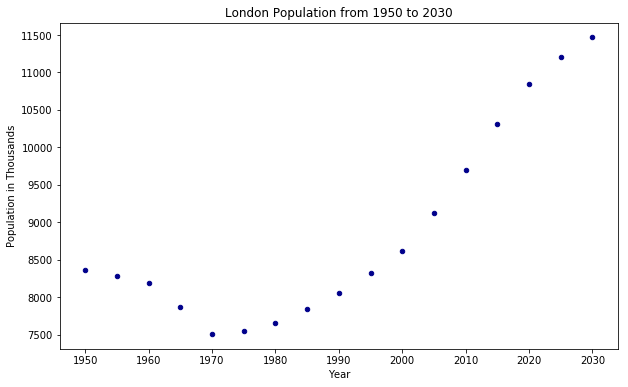

In [16]:
#plotting scatter plot
df_london2.plot(kind = 'scatter', x='Year', y='London', figsize=(10,6), color='darkblue')

plt.title('London Population from 1950 to 2030')
plt.xlabel('Year')
plt.ylabel('Population in Thousands')

plt.show()

In [17]:
#undertaking polynomial regression
x=df_london2['Year']
y=df_london2['London']
fit=np.polyfit(x,y, deg=2)
fit

array([  1.28296661e+00,  -5.06240689e+03,   5.00162094e+06])

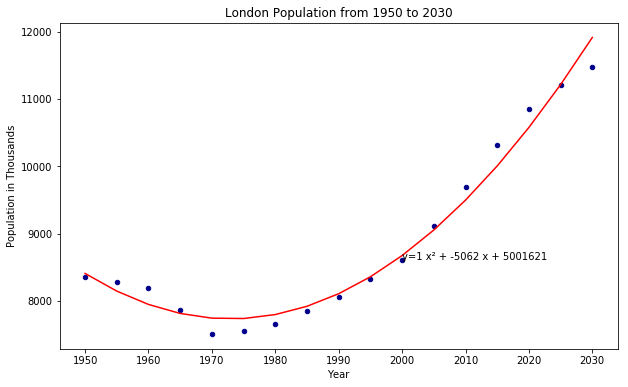

In [18]:
#plotting scatter plot and regression line
df_london2.plot(kind = 'scatter', x='Year', y='London', figsize=(10,6), color='darkblue')

plt.title('London Population from 1950 to 2030')
plt.xlabel('Year')
plt.ylabel('Population in Thousands')

plt.plot(x, fit[0]*x*x+fit[1]*x+fit[2], color='red')
plt.annotate('y={0:.0f} x² + {1:.0f} x + {2:.0f}'.format(fit[0], fit[1], fit[2]), xy=(2000, 8613))
plt.show()

## UK Vegans Age Profile

In [75]:
#obtain table from website and convert to dataframe

url = 'http://veganbits.com/vegan-demographics/'
html = requests.get(url).content
df_list = pd.read_html(html)
df_Vegan = df_list[-1]
print (df_Vegan)
df_Veg.to_csv('Vegan_Demographics.csv')

       0       1          2           3
0    NaN  Vegans  UK Vegans  USA Vegans
1    <15     10%         7%         17%
2  16-24     52%        51%         52%
3  25-34     26%        29%         21%
4  35-44      8%         9%          6%
5  45-54      3%         3%          3%
6    55+      1%         1%          1%


In [76]:
df_Vegan

,0,1,2,3
0,NaN,Vegans,UK Vegans,USA Vegans
1,<15,10%,7%,17%
2,16-24,52%,51%,52%
3,25-34,26%,29%,21%
4,35-44,8%,9%,6%
5,45-54,3%,3%,3%
6,55+,1%,1%,1%


In [77]:
header = df_Vegan.iloc[0]
print(header)

0           NaN
1        Vegans
2     UK Vegans
3    USA Vegans
Name: 0, dtype: object


In [80]:
#clean data
df_Vegan2 = df_Vegan.rename(columns=df_Vegan.iloc[0]).drop(df_Vegan.index[0])
df_Vegan2

,nan,Vegans,UK Vegans,USA Vegans
1,<15,10%,7%,17%
2,16-24,52%,51%,52%
3,25-34,26%,29%,21%
4,35-44,8%,9%,6%
5,45-54,3%,3%,3%
6,55+,1%,1%,1%


In [81]:
df_Vegan2.rename(columns={np.nan: 'Age Range'}, inplace=True)
df_Vegan2

,Age Range,Vegans,UK Vegans,USA Vegans
1,<15,10%,7%,17%
2,16-24,52%,51%,52%
3,25-34,26%,29%,21%
4,35-44,8%,9%,6%
5,45-54,3%,3%,3%
6,55+,1%,1%,1%


In [84]:
df_Vegan3 = df_Vegan2.drop(['Vegans','USA Vegans'], axis=1)
df_Vegan3

,Age Range,UK Vegans
1,<15,7%
2,16-24,51%
3,25-34,29%
4,35-44,9%
5,45-54,3%
6,55+,1%


In [88]:
#check data types and adjust 
df_Vegan3.dtypes

Age Range    object
UK Vegans    object
dtype: object

In [90]:
df_Vegan3['UK Vegans'] = df_Vegan3['UK Vegans'].map(lambda x: x.lstrip('+-').rstrip('%'))
df_Vegan3

,Age Range,UK Vegans
1,<15,7
2,16-24,51
3,25-34,29
4,35-44,9
5,45-54,3
6,55+,1


In [93]:
df_Vegan3['UK Vegans'] = df_Vegan3['UK Vegans'].astype('int64')
df_Vegan3.dtypes

Age Range    object
UK Vegans     int64
dtype: object

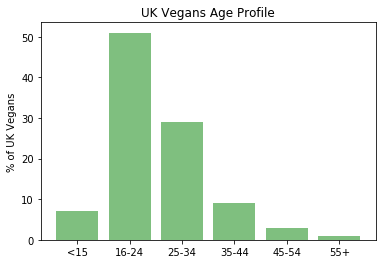

In [101]:
#plot bar chart
objects = ('<15', '16-24', '25-34', '35-44', '45-54', '55+')
y_pos = np.arange(len(objects))
performance = df_Vegan3['UK Vegans']
 
plt.bar(y_pos, performance, align='center', color='g', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('% of UK Vegans')
plt.title('UK Vegans Age Profile')
 
plt.show()

## London Population Age Profile

In [104]:
#download data and read into a datafram
df_UKpop = pd.read_excel('https://data.london.gov.uk/download/census-2011-population-age-uk-districts/547d3ba1-e5f9-46dd-9207-facea1b1d374/census-2011-population-5year-age-ukdistricts.xls',
                      sheet_name='Data')
print("Data downloaded and read into a dataframe")

Data downloaded and read into a dataframe


In [106]:
df_UKpop.head(20)

,Type,Code,Area,All usual residents,Age 0 to 4,Age 5 to 9,Age 10 to 14,Age 15 to 19,Age 20 to 24,Age 25 to 29,...,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 to 89,Age 90 to 100 and over
0,Countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,K02000001,United Kingdom,63182175.0,3913932.0,3516698.0,3669311.0,3996426.0,4297158.0,4306308.0,...,4643071.0,4094427.0,3614087.0,3807952.0,3017482.0,2462751.0,2006005.0,1604771.0,846836.0,439248.0
2,NaN,K04000001,England and Wales,56075912.0,3496750.0,3135711.0,3258677.0,3539385.0,3807245.0,3836609.0,...,4100526.0,3601694.0,3183915.0,3377162.0,2674161.0,2178672.0,1777547.0,1338005.0,825671.0,429017.0
3,NaN,E92000001,England,53012456.0,3318449.0,2972632.0,3080929.0,3340265.0,3595321.0,3650881.0,...,3879815.0,3400095.0,2996992.0,3172277.0,2508154.0,2044129.0,1669345.0,1258773.0,776311.0,403817.0
4,NaN,W92000004,Wales,3063456.0,178301.0,163079.0,177748.0,199120.0,211924.0,185728.0,...,220711.0,201599.0,186923.0,204885.0,166007.0,134543.0,108202.0,79232.0,49360.0,25200.0
5,NaN,N92000002,Northern Ireland,1810863.0,124382.0,111287.0,119034.0,126241.0,126013.0,124099.0,...,131645.0,116933.0,99272.0,94290.0,82121.0,63479.0,50358.0,36366.0,21165.0,10231.0
6,NaN,S92000003,Scotland,5295400.0,292800.0,269700.0,291600.0,330800.0,363900.0,345600.0,...,410900.0,375800.0,330900.0,336500.0,261200.0,220600.0,178100.0,230400.0,NaN,NaN
7,English Regions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,E12000001,North East,2596886.0,149843.0,136299.0,145045.0,169440.0,184018.0,164303.0,...,196020.0,181379.0,160945.0,168576.0,128511.0,110731.0,89861.0,65002.0,37546.0,17834.0
9,NaN,E12000002,North West,7052177.0,432091.0,392166.0,412407.0,456837.0,489640.0,466582.0,...,522351.0,465140.0,409628.0,439644.0,342240.0,285502.0,227350.0,167246.0,99316.0,49501.0


In [158]:
#slice dataframe to London
df_LonPop=df_UKpop.iloc[[14], :]
df_LonPop

,Type,Code,Area,All usual residents,Age 0 to 4,Age 5 to 9,Age 10 to 14,Age 15 to 19,Age 20 to 24,Age 25 to 29,...,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 to 89,Age 90 to 100 and over
14,NaN,E12000007,London,8173941.0,591495.0,482809.0,456865.0,471659.0,629972.0,832966.0,...,556656.0,461290.0,371936.0,342590.0,256772.0,216286.0,176831.0,131830.0,80574.0,42456.0


In [159]:
df_LonPop.dtypes

Type                       object
Code                       object
Area                       object
All usual residents       float64
Age 0 to 4                float64
Age 5 to 9                float64
Age 10 to 14              float64
Age 15 to 19              float64
Age 20 to 24              float64
Age 25 to 29              float64
Age 30 to 34              float64
Age 35 to 39              float64
Age 40 to 44              float64
Age 45 to 49              float64
Age 50 to 54              float64
Age 55 to 59              float64
Age 60 to 64              float64
Age 65 to 69              float64
Age 70 to 74              float64
Age 75 to 79              float64
Age 80 to 84              float64
Age 85 to 89              float64
Age 90 to 100 and over    float64
dtype: object

In [160]:
df_LonPop.head()

,Type,Code,Area,All usual residents,Age 0 to 4,Age 5 to 9,Age 10 to 14,Age 15 to 19,Age 20 to 24,Age 25 to 29,...,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 to 89,Age 90 to 100 and over
14,NaN,E12000007,London,8173941.0,591495.0,482809.0,456865.0,471659.0,629972.0,832966.0,...,556656.0,461290.0,371936.0,342590.0,256772.0,216286.0,176831.0,131830.0,80574.0,42456.0


In [162]:
#reset index
df_LonPop.reset_index(inplace=True)
df_LonPop.head()

,index,Type,Code,Area,All usual residents,Age 0 to 4,Age 5 to 9,Age 10 to 14,Age 15 to 19,Age 20 to 24,...,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 to 89,Age 90 to 100 and over
0,14,NaN,E12000007,London,8173941.0,591495.0,482809.0,456865.0,471659.0,629972.0,...,556656.0,461290.0,371936.0,342590.0,256772.0,216286.0,176831.0,131830.0,80574.0,42456.0


In [163]:
#cleanse dataframe
df_LonPop2 = df_LonPop.drop(['index','Type','Code'], axis=1)
df_LonPop2.head()

,Area,All usual residents,Age 0 to 4,Age 5 to 9,Age 10 to 14,Age 15 to 19,Age 20 to 24,Age 25 to 29,Age 30 to 34,Age 35 to 39,...,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 to 89,Age 90 to 100 and over
0,London,8173941.0,591495.0,482809.0,456865.0,471659.0,629972.0,832966.0,796888.0,664046.0,...,556656.0,461290.0,371936.0,342590.0,256772.0,216286.0,176831.0,131830.0,80574.0,42456.0


In [164]:
#sum age ranges to match with UK Vegan dataset
df_LonPop2["<15"] = df_LonPop2.iloc[:,2:5].sum(axis=1)
df_LonPop2['16-24']=df_LonPop2.iloc[:,5:7].sum(axis=1)
df_LonPop2['25-34']=df_LonPop2.iloc[:,7:9].sum(axis=1)
df_LonPop2['35-44']=df_LonPop2.iloc[:,9:11].sum(axis=1)
df_LonPop2['45-54']=df_LonPop2.iloc[:,11:13].sum(axis=1)
df_LonPop2['55+']=df_LonPop2.iloc[:,13:21].sum(axis=1)
df_LonPop2.head()

,Area,All usual residents,Age 0 to 4,Age 5 to 9,Age 10 to 14,Age 15 to 19,Age 20 to 24,Age 25 to 29,Age 30 to 34,Age 35 to 39,...,Age 75 to 79,Age 80 to 84,Age 85 to 89,Age 90 to 100 and over,<15,16-24,25-34,35-44,45-54,55+
0,London,8173941.0,591495.0,482809.0,456865.0,471659.0,629972.0,832966.0,796888.0,664046.0,...,176831.0,131830.0,80574.0,42456.0,1531169.0,1101631.0,1629854.0,1274066.0,1017946.0,1619275.0


In [190]:
#cleanse data
df_LonPopDemo= df_LonPop2.drop(['Age 0 to 4', 'Age 5 to 9', 'Age 10 to 14', 'Age 15 to 19', 'Age 20 to 24', 'Age 25 to 29',
                   'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44','Age 45 to 49','Age 50 to 54', 'Age 55 to 59',
                   'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 to 84', 'Age 85 to 89',
                   'Age 90 to 100 and over'], axis=1)
df_LonPopDemo.head()

,Area,All usual residents,<15,16-24,25-34,35-44,45-54,55+
0,London,8173941.0,1531169.0,1101631.0,1629854.0,1274066.0,1017946.0,1619275.0


In [191]:
#calculate percentage
df_LonPopDemo['<15'] = df_LonPopDemo['<15'].apply(lambda x: x*100/8173941)
df_LonPopDemo['16-24'] = df_LonPopDemo['16-24'].apply(lambda x: x*100/8173941)
df_LonPopDemo['25-34'] = df_LonPopDemo['25-34'].apply(lambda x: x*100/8173941)
df_LonPopDemo['35-44'] = df_LonPopDemo['35-44'].apply(lambda x: x*100/8173941)
df_LonPopDemo['45-54'] = df_LonPopDemo['45-54'].apply(lambda x: x*100/8173941)
df_LonPopDemo['55+'] = df_LonPopDemo['55+'].apply(lambda x: x*100/8173941)
df_LonPopDemo.head()

,Area,All usual residents,<15,16-24,25-34,35-44,45-54,55+
0,London,8173941.0,18.732323,13.477354,19.939635,15.586924,12.453552,19.810212


In [193]:
#cleanse data
df_LonPopDemo2 = df_LonPopDemo.drop(['Area', 'All usual residents'], axis=1)
df_LonPopDemo2.head()

,<15,16-24,25-34,35-44,45-54,55+
0,18.732323,13.477354,19.939635,15.586924,12.453552,19.810212


In [195]:
#transform data
df_LonPopDemo3 = df_LonPopDemo2.T
df_LonPopDemo3.head(6)

,0
<15,18.732323
16-24,13.477354
25-34,19.939635
35-44,15.586924
45-54,12.453552
55+,19.810212


In [198]:
df_LonPopDemo3.reset_index(inplace=True)
df_LonPopDemo3.head(6)

,index,0
0,<15,18.732323
1,16-24,13.477354
2,25-34,19.939635
3,35-44,15.586924
4,45-54,12.453552
5,55+,19.810212


In [201]:
#relabel dataset
df_LonPopDemo3.rename(columns={'index': 'Age Range', 0: 'London'}, inplace=True)
df_LonPopDemo3.head(6)

,Age Range,London
0,<15,18.732323
1,16-24,13.477354
2,25-34,19.939635
3,35-44,15.586924
4,45-54,12.453552
5,55+,19.810212


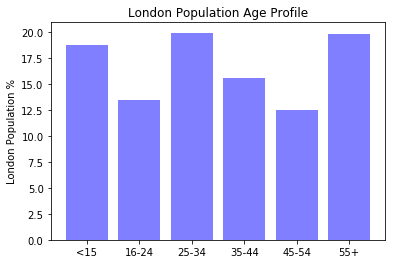

In [261]:
#plot bar chart
objects = ('<15', '16-24', '25-34', '35-44', '45-54', '55+')
y_pos = np.arange(len(objects))
performance = df_LonPopDemo3['London']
 
plt.bar(y_pos, performance, align='center', color='b', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('London Population %')
plt.title('London Population Age Profile')
 
plt.show()

## London's Workday Population By Ward

In [209]:
#download data and read into a datafram
df_UKWork = pd.read_excel('https://data.london.gov.uk/download/workday-population-by-sex-and-age--borough-and-ward/ea37a9f4-3204-45b3-978a-47816a9df337/workday-population-sex-age-borough-ward.xlsx',
                      sheet_name='Persons')
print("Data downloaded and read into a dataframe")

Data downloaded and read into a dataframe


In [210]:
df_UKWork.head(45)

,Code,Area,Area type,Borough,All categories: Age,Age 0 to 4,Age 5 to 9,Age 10 to 15,Age 16 to 19,Age 20 to 24,...,Age 40 to 44,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 and over
0,E92000001,England,Country,NaN,52937050,3318449,2972632,3731755,2686729,3584822,...,3878699,3871436,3391741,2990170,3167668,2506852,2043677,1669153,1258648,1179917
1,K04000001,England and Wales,Country,NaN,55963096,3496750,3135711,3946671,2847210,3792330,...,4086837,4087596,3589614,3174321,3370832,2672374,2178084,1777283,1337819,1254451
2,E12000001,North East,Region,NaN,2567903,149843,136299,176295,136905,180398,...,179785,192584,178372,158759,167257,128378,110739,89861,64983,55369
3,E12000002,North West,Region,NaN,7048102,432091,392166,500291,368456,486798,...,515265,522694,465098,410126,439797,342446,285479,227374,167252,148755
4,E12000003,Yorkshire and The Humber,Region,NaN,5273435,328447,297475,371870,282598,380539,...,382032,380261,342761,304541,325036,252554,211198,170827,125585,114312
5,E12000004,East Midlands,Region,NaN,4443830,270174,247564,320717,236948,301434,...,321812,326735,287836,262083,286526,230894,182231,146379,110003,101656
6,E12000005,West Midlands,Region,NaN,5580675,354801,327060,412581,296613,377238,...,403908,401756,349870,318777,334948,279708,225843,181104,135863,123275
7,E12000006,East,Region,NaN,5647741,361269,328512,418851,284548,343064,...,400663,406555,358919,326374,364099,291977,236254,198546,151187,142509
8,E12000007,London,Region,NaN,8676835,591495,482809,550464,380939,653372,...,694679,637115,521157,412357,366434,263597,218370,177568,132149,123284
9,E12000008,South East,Region,NaN,8436532,534235,488058,619791,435204,528087,...,609751,619187,541780,477691,524681,420740,338437,281936,218563,216981


In [216]:
#slice dataframe to London
df_LonWork=df_UKWork.loc[12:44]
df_LonWork.head(33)

,Code,Area,Area type,Borough,All categories: Age,Age 0 to 4,Age 5 to 9,Age 10 to 15,Age 16 to 19,Age 20 to 24,...,Age 40 to 44,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 and over
12,E09000002,Barking and Dagenham,Local Authority,NaN,169117,18676,14331,15291,9214,10329,...,11462,11028,9599,7821,6895,4914,4340,3780,3195,3049
13,E09000003,Barnet,Local Authority,NaN,314492,26239,22352,25643,16154,20882,...,21422,20037,17735,15099,15226,12600,10109,8834,6920,7607
14,E09000004,Bexley,Local Authority,NaN,196519,15182,14015,18369,11110,11229,...,12789,13181,11550,10051,11232,9456,8651,7445,5921,5162
15,E09000005,Brent,Local Authority,NaN,278874,22446,18648,21663,14245,19483,...,19407,18822,16902,13540,11689,9361,8253,6627,4435,3569
16,E09000006,Bromley,Local Authority,NaN,269290,20095,18061,22430,14181,14488,...,18505,18790,16562,14349,16619,13664,11415,10132,8200,7796
17,E09000007,Camden,Local Authority,NaN,384107,13168,10898,11399,12178,35560,...,35992,30972,24611,19123,15153,8936,6182,4636,3526,3246
18,E09000001,City of London,Local Authority,NaN,360075,236,182,202,2658,27025,...,45977,36052,24622,15064,8471,2571,1057,516,374,299
19,E09000008,Croydon,Local Authority,NaN,310641,27972,23096,28042,17893,19213,...,20552,21454,17818,15612,15265,12129,10408,8842,6359,5871
20,E09000009,Ealing,Local Authority,NaN,306007,25426,20385,23066,14272,20721,...,22311,20787,17419,15170,13546,10239,9024,7244,4850,4631
21,E09000010,Enfield,Local Authority,NaN,280224,24513,20930,24558,15770,18589,...,19684,19115,16024,13319,12707,10815,9084,7554,5516,5258


In [218]:
df_LonWork.reset_index(inplace=True)
df_LonWork.head()

,index,Code,Area,Area type,Borough,All categories: Age,Age 0 to 4,Age 5 to 9,Age 10 to 15,Age 16 to 19,...,Age 40 to 44,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 and over
0,12,E09000002,Barking and Dagenham,Local Authority,NaN,169117,18676,14331,15291,9214,...,11462,11028,9599,7821,6895,4914,4340,3780,3195,3049
1,13,E09000003,Barnet,Local Authority,NaN,314492,26239,22352,25643,16154,...,21422,20037,17735,15099,15226,12600,10109,8834,6920,7607
2,14,E09000004,Bexley,Local Authority,NaN,196519,15182,14015,18369,11110,...,12789,13181,11550,10051,11232,9456,8651,7445,5921,5162
3,15,E09000005,Brent,Local Authority,NaN,278874,22446,18648,21663,14245,...,19407,18822,16902,13540,11689,9361,8253,6627,4435,3569
4,16,E09000006,Bromley,Local Authority,NaN,269290,20095,18061,22430,14181,...,18505,18790,16562,14349,16619,13664,11415,10132,8200,7796


In [219]:
df_LonWork.dtypes

index                   int64
Code                   object
Area                   object
Area type              object
Borough                object
All categories: Age     int64
Age 0 to 4              int64
Age 5 to 9              int64
Age 10 to 15            int64
Age 16 to 19            int64
Age 20 to 24            int64
Age 25 to 29            int64
Age 30 to 34            int64
Age 35 to 39            int64
Age 40 to 44            int64
Age 45 to 49            int64
Age 50 to 54            int64
Age 55 to 59            int64
Age 60 to 64            int64
Age 65 to 69            int64
Age 70 to 74            int64
Age 75 to 79            int64
Age 80 to 84            int64
Age 85 and over         int64
dtype: object

In [220]:
#cleanse data
df_LonWork2 = df_LonWork.drop(['index', 'Code', 'Area type', 'Borough'], axis=1)
df_LonWork2.head()

,Area,All categories: Age,Age 0 to 4,Age 5 to 9,Age 10 to 15,Age 16 to 19,Age 20 to 24,Age 25 to 29,Age 30 to 34,Age 35 to 39,Age 40 to 44,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 and over
0,Barking and Dagenham,169117,18676,14331,15291,9214,10329,11794,11772,11627,11462,11028,9599,7821,6895,4914,4340,3780,3195,3049
1,Barnet,314492,26239,22352,25643,16154,20882,23960,22800,20873,21422,20037,17735,15099,15226,12600,10109,8834,6920,7607
2,Bexley,196519,15182,14015,18369,11110,11229,10037,10291,10848,12789,13181,11550,10051,11232,9456,8651,7445,5921,5162
3,Brent,278874,22446,18648,21663,14245,19483,25130,23678,20976,19407,18822,16902,13540,11689,9361,8253,6627,4435,3569
4,Bromley,269290,20095,18061,22430,14181,14488,13971,14532,15500,18505,18790,16562,14349,16619,13664,11415,10132,8200,7796


In [221]:
#sum age ranges to match with UK Vegan dataset
df_LonWork2["<15"] = df_LonWork2.iloc[:,2:5].sum(axis=1)
df_LonWork2['16-24']=df_LonWork2.iloc[:,5:7].sum(axis=1)
df_LonWork2['25-34']=df_LonWork2.iloc[:,7:9].sum(axis=1)
df_LonWork2['35-44']=df_LonWork2.iloc[:,9:11].sum(axis=1)
df_LonWork2['45-54']=df_LonWork2.iloc[:,11:13].sum(axis=1)
df_LonWork2['55+']=df_LonWork2.iloc[:,13:20].sum(axis=1)
df_LonWork2.head()

,Area,All categories: Age,Age 0 to 4,Age 5 to 9,Age 10 to 15,Age 16 to 19,Age 20 to 24,Age 25 to 29,Age 30 to 34,Age 35 to 39,...,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 and over,<15,16-24,25-34,35-44,45-54,55+
0,Barking and Dagenham,169117,18676,14331,15291,9214,10329,11794,11772,11627,...,4340,3780,3195,3049,48298,19543,23566,23089,20627,33994
1,Barnet,314492,26239,22352,25643,16154,20882,23960,22800,20873,...,10109,8834,6920,7607,74234,37036,46760,42295,37772,76395
2,Bexley,196519,15182,14015,18369,11110,11229,10037,10291,10848,...,8651,7445,5921,5162,47566,22339,20328,23637,24731,57918
3,Brent,278874,22446,18648,21663,14245,19483,25130,23678,20976,...,8253,6627,4435,3569,62757,33728,48808,40383,35724,57474
4,Bromley,269290,20095,18061,22430,14181,14488,13971,14532,15500,...,11415,10132,8200,7796,60586,28669,28503,34005,35352,82175


In [222]:
#cleanse data
df_LonWorkDemo= df_LonWork2.drop(['Age 0 to 4', 'Age 5 to 9', 'Age 10 to 15', 'Age 16 to 19', 'Age 20 to 24','Age 25 to 29',
                   'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44','Age 45 to 49','Age 50 to 54', 'Age 55 to 59',
                   'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 to 84',
                   'Age 85 and over'], axis=1)
df_LonWorkDemo.head()

,Area,All categories: Age,<15,16-24,25-34,35-44,45-54,55+
0,Barking and Dagenham,169117,48298,19543,23566,23089,20627,33994
1,Barnet,314492,74234,37036,46760,42295,37772,76395
2,Bexley,196519,47566,22339,20328,23637,24731,57918
3,Brent,278874,62757,33728,48808,40383,35724,57474
4,Bromley,269290,60586,28669,28503,34005,35352,82175


In [223]:
# Sort data in with decending population
df_LonWorkDemo2 = df_LonWorkDemo.sort_values('All categories: Age', ascending=False)
df_LonWorkDemo2.head(10)

,Area,All categories: Age,<15,16-24,25-34,35-44,45-54,55+
32,Westminster,689572,32584,78035,222510,157219,108701,90523
5,Camden,384107,35465,47738,106369,78150,55583,60802
29,Tower Hamlets,368200,50143,45739,104970,78444,48571,40333
6,City of London,360075,620,29683,138140,102606,60674,28352
27,Southwark,324494,53382,41015,74004,59282,47397,49414
1,Barnet,314492,74234,37036,46760,42295,37772,76395
7,Croydon,310641,79110,37106,40792,39875,39272,74486
16,Hillingdon,308668,56893,37987,50835,49609,45939,67405
8,Ealing,306007,68877,34993,53307,45920,38206,64704
9,Enfield,280224,70001,34359,38905,37567,35139,64253


In [225]:
#reset index
df_LonWorkDemo2.reset_index(inplace=True)
df_LonWorkDemo2.head(10)

,level_0,index,Area,All categories: Age,<15,16-24,25-34,35-44,45-54,55+
0,0,32,Westminster,689572,32584,78035,222510,157219,108701,90523
1,1,5,Camden,384107,35465,47738,106369,78150,55583,60802
2,2,29,Tower Hamlets,368200,50143,45739,104970,78444,48571,40333
3,3,6,City of London,360075,620,29683,138140,102606,60674,28352
4,4,27,Southwark,324494,53382,41015,74004,59282,47397,49414
5,5,1,Barnet,314492,74234,37036,46760,42295,37772,76395
6,6,7,Croydon,310641,79110,37106,40792,39875,39272,74486
7,7,16,Hillingdon,308668,56893,37987,50835,49609,45939,67405
8,8,8,Ealing,306007,68877,34993,53307,45920,38206,64704
9,9,9,Enfield,280224,70001,34359,38905,37567,35139,64253


In [226]:
#cleanse data
df_LonWorkDemo3= df_LonWorkDemo2.drop(['level_0', 'index'], axis=1)
df_LonWorkDemo3.head(10)

,Area,All categories: Age,<15,16-24,25-34,35-44,45-54,55+
0,Westminster,689572,32584,78035,222510,157219,108701,90523
1,Camden,384107,35465,47738,106369,78150,55583,60802
2,Tower Hamlets,368200,50143,45739,104970,78444,48571,40333
3,City of London,360075,620,29683,138140,102606,60674,28352
4,Southwark,324494,53382,41015,74004,59282,47397,49414
5,Barnet,314492,74234,37036,46760,42295,37772,76395
6,Croydon,310641,79110,37106,40792,39875,39272,74486
7,Hillingdon,308668,56893,37987,50835,49609,45939,67405
8,Ealing,306007,68877,34993,53307,45920,38206,64704
9,Enfield,280224,70001,34359,38905,37567,35139,64253


In [227]:
#Slicing top 5 areas for further investigation as these are the most populous London workday populated areas 
df_LonWorkDemo4=df_LonWorkDemo3.loc[0:5]
df_LonWorkDemo4.head()

,Area,All categories: Age,<15,16-24,25-34,35-44,45-54,55+
0,Westminster,689572,32584,78035,222510,157219,108701,90523
1,Camden,384107,35465,47738,106369,78150,55583,60802
2,Tower Hamlets,368200,50143,45739,104970,78444,48571,40333
3,City of London,360075,620,29683,138140,102606,60674,28352
4,Southwark,324494,53382,41015,74004,59282,47397,49414


In [235]:
#create 1 of 5 separate dataframes based around the areas 
df_Westminster=df_LonWorkDemo4.iloc[[0], :]
df_Westminster.head()

,Area,Total,<15,16-24,25-34,35-44,45-54,55+
0,Westminster,689572,32584,78035,222510,157219,108701,90523


In [236]:
#and then calculate work day population percentages
df_Westminster['<15'] = df_Westminster['<15'].apply(lambda x: x*100/689572)
df_Westminster['16-24'] = df_Westminster['16-24'].apply(lambda x: x*100/689572)
df_Westminster['25-34'] = df_Westminster['25-34'].apply(lambda x: x*100/689572)
df_Westminster['35-44'] = df_Westminster['35-44'].apply(lambda x: x*100/689572)
df_Westminster['45-54'] = df_Westminster['45-54'].apply(lambda x: x*100/689572)
df_Westminster['55+'] = df_Westminster['55+'].apply(lambda x: x*100/689572)
df_Westminster.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Area,Total,<15,16-24,25-34,35-44,45-54,55+
0,Westminster,689572,4.72525,11.31644,32.267842,22.799505,15.763546,13.127418


In [239]:
#cleanse data and transform data
df_Westminster2 = df_Westminster.drop(['Area', 'Total'], axis=1)
df_Westminster3 = df_Westminster2.T
df_Westminster3.head(7)

,0
<15,4.725250
16-24,11.316440
25-34,32.267842
35-44,22.799505
45-54,15.763546
55+,13.127418


In [240]:
df_Westminster3.reset_index(inplace=True)
df_Westminster3.head(7)

,index,0
0,<15,4.725250
1,16-24,11.316440
2,25-34,32.267842
3,35-44,22.799505
4,45-54,15.763546
5,55+,13.127418


In [241]:
#relabel dataset
df_Westminster3.rename(columns={'index': 'Age Range', 0: 'Westminster'}, inplace=True)
df_Westminster3.head(7)

,Age Range,Westminster
0,<15,4.725250
1,16-24,11.316440
2,25-34,32.267842
3,35-44,22.799505
4,45-54,15.763546
5,55+,13.127418


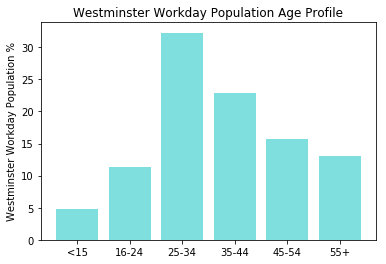

In [260]:
#plot bar chart
objects = ('<15', '16-24', '25-34', '35-44', '45-54', '55+')
y_pos = np.arange(len(objects))
performance = df_Westminster3['Westminster']
 
plt.bar(y_pos, performance, align='center', color='c', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Westminster Workday Population %')
plt.title('Westminster Workday Population Age Profile')
 
plt.show()

In [243]:
#create 2 of 5 separate dataframes based around the areas 
df_Camden=df_LonWorkDemo4.iloc[[1], :]
df_Camden.head()

,Area,Total,<15,16-24,25-34,35-44,45-54,55+
1,Camden,384107,35465,47738,106369,78150,55583,60802


In [244]:
#and then calculate work day population percentages
df_Camden['<15'] = df_Camden['<15'].apply(lambda x: x*100/384107)
df_Camden['16-24'] = df_Camden['16-24'].apply(lambda x: x*100/384107)
df_Camden['25-34'] = df_Camden['25-34'].apply(lambda x: x*100/384107)
df_Camden['35-44'] = df_Camden['35-44'].apply(lambda x: x*100/384107)
df_Camden['45-54'] = df_Camden['45-54'].apply(lambda x: x*100/384107)
df_Camden['55+'] = df_Camden['55+'].apply(lambda x: x*100/384107)
df_Camden.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Area,Total,<15,16-24,25-34,35-44,45-54,55+
1,Camden,384107,9.233104,12.428308,27.692544,20.345893,14.470707,15.829443


In [245]:
#cleanse data and transform data
df_Camden2 = df_Camden.drop(['Area', 'Total'], axis=1)
df_Camden3 = df_Camden2.T
df_Camden3.head(7)

,1
<15,9.233104
16-24,12.428308
25-34,27.692544
35-44,20.345893
45-54,14.470707
55+,15.829443


In [246]:
df_Camden3.reset_index(inplace=True)
df_Camden3.head(7)

,index,1
0,<15,9.233104
1,16-24,12.428308
2,25-34,27.692544
3,35-44,20.345893
4,45-54,14.470707
5,55+,15.829443


In [247]:
#relabel dataset
df_Camden3.rename(columns={'index': 'Age Range', 1: 'Camden'}, inplace=True)
df_Camden3.head(7)

,Age Range,Camden
0,<15,9.233104
1,16-24,12.428308
2,25-34,27.692544
3,35-44,20.345893
4,45-54,14.470707
5,55+,15.829443


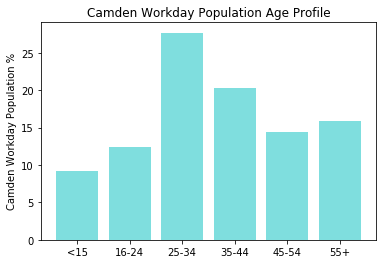

In [259]:
#plot bar chart
objects = ('<15', '16-24', '25-34', '35-44', '45-54', '55+')
y_pos = np.arange(len(objects))
performance = df_Camden3['Camden']
 
plt.bar(y_pos, performance, align='center', color='c', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Camden Workday Population %')
plt.title('Camden Workday Population Age Profile')
 
plt.show()

In [249]:
#create 3 of 5 separate dataframes based around the areas 
df_TowerHamlets=df_LonWorkDemo4.iloc[[2], :]
df_TowerHamlets.head()

,Area,Total,<15,16-24,25-34,35-44,45-54,55+
2,Tower Hamlets,368200,50143,45739,104970,78444,48571,40333


In [250]:
#and then calculate work day population percentages
df_TowerHamlets['<15'] = df_TowerHamlets['<15'].apply(lambda x: x*100/368200)
df_TowerHamlets['16-24'] = df_TowerHamlets['16-24'].apply(lambda x: x*100/368200)
df_TowerHamlets['25-34'] = df_TowerHamlets['25-34'].apply(lambda x: x*100/368200)
df_TowerHamlets['35-44'] = df_TowerHamlets['35-44'].apply(lambda x: x*100/368200)
df_TowerHamlets['45-54'] = df_TowerHamlets['45-54'].apply(lambda x: x*100/368200)
df_TowerHamlets['55+'] = df_TowerHamlets['55+'].apply(lambda x: x*100/368200)
df_TowerHamlets.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Area,Total,<15,16-24,25-34,35-44,45-54,55+
2,Tower Hamlets,368200,13.618414,12.422325,28.508963,21.304726,13.191472,10.954101


In [254]:
#cleanse data and transform data
df_TowerHamlets2 = df_TowerHamlets.drop(['Area', 'Total'], axis=1)
df_TowerHamlets3 = df_TowerHamlets2.T
df_TowerHamlets3.head(7)

,2
<15,13.618414
16-24,12.422325
25-34,28.508963
35-44,21.304726
45-54,13.191472
55+,10.954101


In [255]:
df_TowerHamlets3.reset_index(inplace=True)
df_TowerHamlets3.head(7)

,index,2
0,<15,13.618414
1,16-24,12.422325
2,25-34,28.508963
3,35-44,21.304726
4,45-54,13.191472
5,55+,10.954101


In [256]:
#relabel dataset
df_TowerHamlets3.rename(columns={'index': 'Age Range', 2: 'Tower Hamlets'}, inplace=True)
df_TowerHamlets3.head(7)

,Age Range,Tower Hamlets
0,<15,13.618414
1,16-24,12.422325
2,25-34,28.508963
3,35-44,21.304726
4,45-54,13.191472
5,55+,10.954101


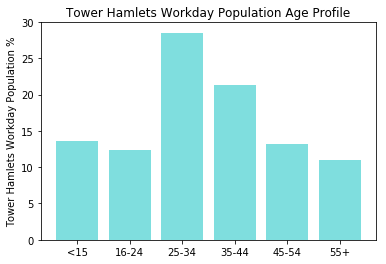

In [258]:
#plot bar chart
objects = ('<15', '16-24', '25-34', '35-44', '45-54', '55+')
y_pos = np.arange(len(objects))
performance = df_TowerHamlets3['Tower Hamlets']
 
plt.bar(y_pos, performance, align='center', color='c', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tower Hamlets Workday Population %')
plt.title('Tower Hamlets Workday Population Age Profile')
 
plt.show()

In [262]:
#create 4 of 5 separate dataframes based around the areas 
df_City=df_LonWorkDemo4.iloc[[3], :]
df_City.head()

,Area,Total,<15,16-24,25-34,35-44,45-54,55+
3,City of London,360075,620,29683,138140,102606,60674,28352


In [263]:
#and then calculate work day population percentages
df_City['<15'] = df_City['<15'].apply(lambda x: x*100/360075)
df_City['16-24'] = df_City['16-24'].apply(lambda x: x*100/360075)
df_City['25-34'] = df_City['25-34'].apply(lambda x: x*100/360075)
df_City['35-44'] = df_City['35-44'].apply(lambda x: x*100/360075)
df_City['45-54'] = df_City['45-54'].apply(lambda x: x*100/360075)
df_City['55+'] = df_City['55+'].apply(lambda x: x*100/360075)
df_City.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Area,Total,<15,16-24,25-34,35-44,45-54,55+
3,City of London,360075,0.172186,8.24356,38.36423,28.49573,16.850378,7.873915


In [264]:
#cleanse data and transform data
df_City2 = df_City.drop(['Area', 'Total'], axis=1)
df_City3 = df_City2.T
df_City3.head(7)

,3
<15,0.172186
16-24,8.243560
25-34,38.364230
35-44,28.495730
45-54,16.850378
55+,7.873915


In [265]:
df_City3.reset_index(inplace=True)
df_City3.head(7)

,index,3
0,<15,0.172186
1,16-24,8.243560
2,25-34,38.364230
3,35-44,28.495730
4,45-54,16.850378
5,55+,7.873915


In [266]:
#relabel dataset
df_City3.rename(columns={'index': 'Age Range', 3: 'City of London'}, inplace=True)
df_City3.head(7)

,Age Range,City of London
0,<15,0.172186
1,16-24,8.243560
2,25-34,38.364230
3,35-44,28.495730
4,45-54,16.850378
5,55+,7.873915


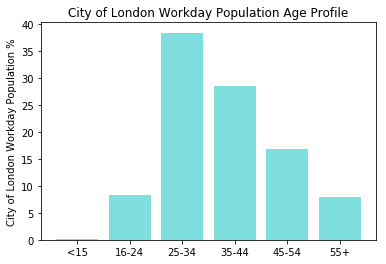

In [267]:
#plot bar chart
objects = ('<15', '16-24', '25-34', '35-44', '45-54', '55+')
y_pos = np.arange(len(objects))
performance = df_City3['City of London']
 
plt.bar(y_pos, performance, align='center', color='c', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('City of London Workday Population %')
plt.title('City of London Workday Population Age Profile')
 
plt.show()

In [268]:
#create 5 of 5 separate dataframes based around the areas 
df_Southwark=df_LonWorkDemo4.iloc[[4], :]
df_Southwark.head()

,Area,Total,<15,16-24,25-34,35-44,45-54,55+
4,Southwark,324494,53382,41015,74004,59282,47397,49414


In [269]:
#and then calculate work day population percentages
df_Southwark['<15'] = df_Southwark['<15'].apply(lambda x: x*100/324494)
df_Southwark['16-24'] = df_Southwark['16-24'].apply(lambda x: x*100/324494)
df_Southwark['25-34'] = df_Southwark['25-34'].apply(lambda x: x*100/324494)
df_Southwark['35-44'] = df_Southwark['35-44'].apply(lambda x: x*100/324494)
df_Southwark['45-54'] = df_Southwark['45-54'].apply(lambda x: x*100/324494)
df_Southwark['55+'] = df_Southwark['55+'].apply(lambda x: x*100/324494)
df_Southwark.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Area,Total,<15,16-24,25-34,35-44,45-54,55+
4,Southwark,324494,16.450843,12.639679,22.805969,18.269059,14.606433,15.228017


In [270]:
#cleanse data and transform data
df_Southwark2 = df_Southwark.drop(['Area', 'Total'], axis=1)
df_Southwark3 = df_Southwark2.T
df_Southwark3.head(7)

,4
<15,16.450843
16-24,12.639679
25-34,22.805969
35-44,18.269059
45-54,14.606433
55+,15.228017


In [271]:
df_Southwark3.reset_index(inplace=True)
df_Southwark3.head(7)

,index,4
0,<15,16.450843
1,16-24,12.639679
2,25-34,22.805969
3,35-44,18.269059
4,45-54,14.606433
5,55+,15.228017


In [272]:
df_Southwark3.rename(columns={'index': 'Age Range', 4: 'Southwark'}, inplace=True)
df_Southwark3.head(7)

,Age Range,Southwark
0,<15,16.450843
1,16-24,12.639679
2,25-34,22.805969
3,35-44,18.269059
4,45-54,14.606433
5,55+,15.228017


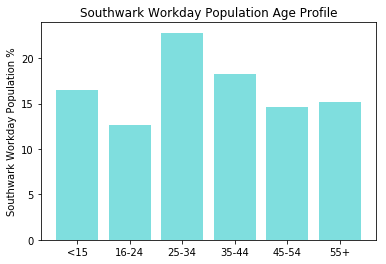

In [273]:
#plot bar chart
objects = ('<15', '16-24', '25-34', '35-44', '45-54', '55+')
y_pos = np.arange(len(objects))
performance = df_Southwark3['Southwark']
 
plt.bar(y_pos, performance, align='center', color='c', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Southwark Workday Population %')
plt.title('Southwark Workday Population Age Profile')
 
plt.show()

## Assessing Which Areas Are Suitable For Further Investigation

In [279]:
#reset UK Vegan profile so can combine with other datasets
df_Vegan3.reset_index(inplace=True)
df_Vegan3

,index,Age Range,UK Vegans
0,1,<15,7
1,2,16-24,51
2,3,25-34,29
3,4,35-44,9
4,5,45-54,3
5,6,55+,1


In [285]:
#Combine UK Vegan dataset with London and London area data
df_LondAreas=pd.concat([df_Vegan3, df_LonPopDemo3[['London']], df_Westminster3[['Westminster']], 
                         df_Camden3[['Camden']], df_TowerHamlets3[['Tower Hamlets']], df_City3[['City of London']],
                         df_Southwark3[['Southwark']]], axis=1)
df_LondAreas = df_LondAreas.round(0)
df_LondAreas.drop(['index'], axis=1, inplace=True)
df_LondAreas

,Age Range,UK Vegans,London,Westminster,Camden,Tower Hamlets,City of London,Southwark
0,<15,7,19.0,5.0,9.0,14.0,0.0,16.0
1,16-24,51,13.0,11.0,12.0,12.0,8.0,13.0
2,25-34,29,20.0,32.0,28.0,29.0,38.0,23.0
3,35-44,9,16.0,23.0,20.0,21.0,28.0,18.0
4,45-54,3,12.0,16.0,14.0,13.0,17.0,15.0
5,55+,1,20.0,13.0,16.0,11.0,8.0,15.0


Based on above dataset comparison it appears that none of the London key areas are a perfect match for the UK Vegan profile, however it would appear that Westminster is the closest fit.

## Utilising Foursquare To Find Venues

In [286]:
#Obtaining geographical coordinates of London's top 5 workday population areas
address = "Westminster, UK"

geolocator = Nominatim()
location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Westminster are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Westminster are 51.4973206, -0.137149.


/anaconda3/lib/python3.7/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [342]:
data = [['Westminster', 51.4973, -0.1371], ['Adelphi', 51.5101, -0.1229],['Aldwych', 51.5121, -0.1160],
        ['Belgravia', 51.4982, -0.1535],['Charing Cross', 51.5081, -0.1248], ['Chinatown', 51.5110, -0.1318],
        ['Covent Garden', 51.5118, -0.1232], ['Holborn', 51.5172, -0.1188],['Hyde Park', 51.5073, -0.1657],
        ['Knightsbridge', 51.4991, -0.1644],['Mayfair', 51.5116, -0.1478], ['Millbank', 51.4922, -0.1258],
        ['Pimlico', 51.4907, -0.1404], ['St James', 51.5070, -0.1361],['Strand', 51.5114, -0.1190],
        ['Soho', 51.5136, -0.1365],['Temple', 51.5123, -0.1110], ['Victoria', 51.4952, -0.1439]]
df_Westminsterdata = pd.DataFrame(data,columns=['Neighborhood','Latitude','Longitude'])
print(df_Westminsterdata)

     Neighborhood  Latitude  Longitude
0     Westminster   51.4973    -0.1371
1         Adelphi   51.5101    -0.1229
2         Aldwych   51.5121    -0.1160
3       Belgravia   51.4982    -0.1535
4   Charing Cross   51.5081    -0.1248
5       Chinatown   51.5110    -0.1318
6   Covent Garden   51.5118    -0.1232
7         Holborn   51.5172    -0.1188
8       Hyde Park   51.5073    -0.1657
9   Knightsbridge   51.4991    -0.1644
10        Mayfair   51.5116    -0.1478
11       Millbank   51.4922    -0.1258
12        Pimlico   51.4907    -0.1404
13       St James   51.5070    -0.1361
14         Strand   51.5114    -0.1190
15           Soho   51.5136    -0.1365
16         Temple   51.5123    -0.1110
17       Victoria   51.4952    -0.1439


In [344]:
#creating map of Westminster and adding markers of neighborhoods to map
map_Westminster=folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(df_Westminsterdata['Latitude'], df_Westminsterdata['Longitude'],
                           df_Westminsterdata['Neighborhood']):
    label=folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Westminster)
    
map_Westminster

In [345]:
#Define Foursquare credentials and version
CLIENT_ID = 'AVTAIQFV3C22ZFIZGUBZE3IOU0J2HLMVU1QT32QNKCXAMRCW'
CLIENT_SECRET = '3EEBKPNKLPZPHCWBCRLCPE5NX1HHOGNEHPQMTXKBCQX44SDJ'
VERSION = '20180605'

In [346]:
neighborhood_latitude = df_Westminsterdata.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_Westminsterdata.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_Westminsterdata.loc[0, 'Neighborhood'] # neighborhood name

In [347]:
#Top 100 venues in Westminster
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=AVTAIQFV3C22ZFIZGUBZE3IOU0J2HLMVU1QT32QNKCXAMRCW&client_secret=3EEBKPNKLPZPHCWBCRLCPE5NX1HHOGNEHPQMTXKBCQX44SDJ&v=20180605&ll=51.4973,-0.1371&radius=500&limit=100'

In [348]:
#results of URL
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c13d2a8db04f54e6c5f14b4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'City of Westminster',
  'headerFullLocation': 'City of Westminster, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 75,
  'suggestedBounds': {'ne': {'lat': 51.501800004500005,
    'lng': -0.1298851714035726},
   'sw': {'lat': 51.4927999955, 'lng': -0.14431482859642739}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '534295ec498e271e54f5f569',
       'name': 'Iris & June',
       'location': {'address': '1 Howick Pl',
        'lat': 51.496791,
        'lng': -0.136011,
        'labeledLatLngs': [{'label': 'display',
          'lat': 51.496791,


In [349]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [350]:
#clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Iris & June,Coffee Shop,51.496791,-0.136011
1,Curzon Victoria,Movie Theater,51.497473,-0.136744
2,Quilon,Indian Restaurant,51.498772,-0.137522
3,Run & Become,Sporting Goods Shop,51.498128,-0.135426
4,Taj 51 Buckingham Gate Suites & Residences,Hotel,51.498598,-0.137404


In [351]:
#Create function to repeat the same process to all neighborhoods in Westminster

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

WestminsterDistricts_venues = getNearbyVenues(names=df_Westminsterdata['Neighborhood'],
                                   latitudes=df_Westminsterdata['Latitude'],
                                   longitudes=df_Westminsterdata['Longitude']
                                  )

Westminster
Adelphi
Aldwych
Belgravia
Charing Cross
Chinatown
Covent Garden
Holborn
Hyde Park
Knightsbridge
Mayfair
Millbank
Pimlico
St James
Strand
Soho
Temple
Victoria


In [352]:
#get shape of dataframe 
print(WestminsterDistricts_venues.shape)
WestminsterDistricts_venues.head()

(1553, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Westminster,51.4973,-0.1371,Iris & June,51.496791,-0.136011,Coffee Shop
1,Westminster,51.4973,-0.1371,Curzon Victoria,51.497473,-0.136744,Movie Theater
2,Westminster,51.4973,-0.1371,Quilon,51.498772,-0.137522,Indian Restaurant
3,Westminster,51.4973,-0.1371,Run & Become,51.498128,-0.135426,Sporting Goods Shop
4,Westminster,51.4973,-0.1371,Taj 51 Buckingham Gate Suites & Residences,51.498598,-0.137404,Hotel


In [353]:
# number of venues returned for each neightborhood

WestminsterDistricts_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adelphi,100,100,100,100,100,100
Aldwych,100,100,100,100,100,100
Belgravia,58,58,58,58,58,58
Charing Cross,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Covent Garden,100,100,100,100,100,100
Holborn,100,100,100,100,100,100
Hyde Park,22,22,22,22,22,22
Knightsbridge,100,100,100,100,100,100


In [354]:
#unique categories
print('There are {} uniques categories.'.format(len(WestminsterDistricts_venues['Venue Category'].unique())))

There are 201 uniques categories.


In [355]:
#analyzing each neighborhood
# one hot encoding
WestminsterDistricts_onehot = pd.get_dummies(WestminsterDistricts_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
WestminsterDistricts_onehot['Neighborhood'] = WestminsterDistricts_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [WestminsterDistricts_onehot.columns[-1]] + list(WestminsterDistricts_onehot.columns[:-1])
WestminsterDistricts_onehot = WestminsterDistricts_onehot[fixed_columns]

WestminsterDistricts_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Westminster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Westminster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Westminster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Westminster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Westminster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [356]:
WestminsterDistricts_onehot.shape

(1553, 202)

In [357]:
#group by neighborhood by taking the mean of the frequency of occurance of each category

WestminsterDistricts_grouped = WestminsterDistricts_onehot.groupby('Neighborhood').mean().reset_index()
WestminsterDistricts_grouped

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Adelphi,0.01,0.00,0.01,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,...,0.00,0.000000,0.00,0.00,0.000000,0.030000,0.01,0.00,0.000000,0.00
1,Aldwych,0.00,0.00,0.02,0.00,0.010000,0.010000,0.010000,0.000000,0.000000,...,0.00,0.000000,0.00,0.00,0.000000,0.010000,0.01,0.00,0.000000,0.00
2,Belgravia,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.017241,0.00
3,Charing Cross,0.01,0.01,0.01,0.00,0.000000,0.010000,0.010000,0.020000,0.010000,...,0.00,0.000000,0.00,0.00,0.000000,0.040000,0.00,0.00,0.000000,0.00
4,Chinatown,0.00,0.00,0.01,0.00,0.000000,0.010000,0.010000,0.010000,0.000000,...,0.01,0.000000,0.01,0.00,0.010000,0.010000,0.00,0.00,0.000000,0.00
5,Covent Garden,0.01,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.010000,0.010000,...,0.00,0.000000,0.00,0.00,0.000000,0.040000,0.01,0.00,0.000000,0.00
6,Holborn,0.00,0.00,0.00,0.01,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.01,0.000000,0.00
7,Hyde Park,0.00,0.00,0.00,0.00,0.000000,0.045455,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00
8,Knightsbridge,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,...,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.010000,0.00
9,Mayfair,0.01,0.00,0.00,0.00,0.000000,0.060000,0.000000,0.000000,0.010000,...,0.00,0.000000,0.00,0.01,0.000000,0.010000,0.01,0.00,0.010000,0.00


In [358]:
#print top 5 venues for each neighborhood

num_top_venues = 5

for hood in WestminsterDistricts_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = WestminsterDistricts_grouped[WestminsterDistricts_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelphi----
               venue  freq
0       Burger Joint  0.06
1  French Restaurant  0.05
2       Dessert Shop  0.04
3     Ice Cream Shop  0.04
4            Theater  0.04


----Aldwych----
          venue  freq
0       Theater  0.07
1           Pub  0.05
2         Hotel  0.05
3   Coffee Shop  0.04
4  Cocktail Bar  0.04


----Belgravia----
        venue  freq
0       Hotel  0.12
1        Café  0.09
2  Restaurant  0.07
3   Hotel Bar  0.05
4    Boutique  0.05


----Charing Cross----
               venue  freq
0              Hotel  0.07
1                Pub  0.05
2            Theater  0.05
3  French Restaurant  0.04
4           Wine Bar  0.04


----Chinatown----
                venue  freq
0             Theater  0.08
1  Italian Restaurant  0.05
2               Hotel  0.04
3        Cocktail Bar  0.04
4          Restaurant  0.04


----Covent Garden----
               venue  freq
0       Burger Joint  0.05
1  French Restaurant  0.05
2     Ice Cream Shop  0.05
3       Dessert Shop  0.04

In [359]:
#sort venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = WestminsterDistricts_grouped['Neighborhood']

for ind in np.arange(WestminsterDistricts_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(WestminsterDistricts_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelphi,Burger Joint,French Restaurant,Ice Cream Shop,Coffee Shop,Dessert Shop,Theater,Hotel,Wine Bar,Cocktail Bar,Italian Restaurant
1,Aldwych,Theater,Hotel,Pub,Coffee Shop,Cocktail Bar,Italian Restaurant,French Restaurant,Burger Joint,Restaurant,Dessert Shop
2,Belgravia,Hotel,Café,Restaurant,Hotel Bar,Boutique,Italian Restaurant,Plaza,Shoe Store,Clothing Store,Gastropub
3,Charing Cross,Hotel,Theater,Pub,Ice Cream Shop,French Restaurant,Wine Bar,Garden,Plaza,Steakhouse,Pizza Place
4,Chinatown,Theater,Italian Restaurant,Cocktail Bar,Restaurant,Ice Cream Shop,Hotel,Japanese Restaurant,Seafood Restaurant,Lounge,Ramen Restaurant
5,Covent Garden,Burger Joint,French Restaurant,Ice Cream Shop,Dessert Shop,Wine Bar,Clothing Store,Theater,Coffee Shop,Sushi Restaurant,Indian Restaurant
6,Holborn,Coffee Shop,Pub,Restaurant,Café,Hotel,Theater,Japanese Restaurant,Korean Restaurant,Bakery,Bookstore
7,Hyde Park,Bar,Scenic Lookout,Modern European Restaurant,Bakery,General Entertainment,Monument / Landmark,Café,Fountain,Outdoor Sculpture,Boat or Ferry
8,Knightsbridge,Café,Boutique,Italian Restaurant,Hotel,Japanese Restaurant,Clothing Store,Seafood Restaurant,Tea Room,Middle Eastern Restaurant,Restaurant
9,Mayfair,Boutique,French Restaurant,Art Gallery,Clothing Store,Coffee Shop,Hotel,Steakhouse,Italian Restaurant,Lounge,Hotel Bar


In [333]:
#import KMeans
from sklearn.cluster import KMeans

In [368]:
#Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters
kclusters = 5

WestminsterDistricts_grouped_clustering = WestminsterDistricts_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(WestminsterDistricts_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 0, 3, 3, 3, 1, 2, 0, 0], dtype=int32)

In [370]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
WestminsterDistricts_merged = df_Westminsterdata

# add clustering labels
WestminsterDistricts_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
WestminsterDistricts_merged = WestminsterDistricts_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

WestminsterDistricts_merged.head(18) 

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Westminster,51.4973,-0.1371,3,Hotel,Sandwich Place,Coffee Shop,Italian Restaurant,Theater,Sushi Restaurant,Pub,Café,Juice Bar,Hotel Bar
1,Adelphi,51.5101,-0.1229,3,Burger Joint,French Restaurant,Ice Cream Shop,Coffee Shop,Dessert Shop,Theater,Hotel,Wine Bar,Cocktail Bar,Italian Restaurant
2,Aldwych,51.5121,-0.1160,0,Theater,Hotel,Pub,Coffee Shop,Cocktail Bar,Italian Restaurant,French Restaurant,Burger Joint,Restaurant,Dessert Shop
3,Belgravia,51.4982,-0.1535,3,Hotel,Café,Restaurant,Hotel Bar,Boutique,Italian Restaurant,Plaza,Shoe Store,Clothing Store,Gastropub
4,Charing Cross,51.5081,-0.1248,3,Hotel,Theater,Pub,Ice Cream Shop,French Restaurant,Wine Bar,Garden,Plaza,Steakhouse,Pizza Place
5,Chinatown,51.5110,-0.1318,3,Theater,Italian Restaurant,Cocktail Bar,Restaurant,Ice Cream Shop,Hotel,Japanese Restaurant,Seafood Restaurant,Lounge,Ramen Restaurant
6,Covent Garden,51.5118,-0.1232,1,Burger Joint,French Restaurant,Ice Cream Shop,Dessert Shop,Wine Bar,Clothing Store,Theater,Coffee Shop,Sushi Restaurant,Indian Restaurant
7,Holborn,51.5172,-0.1188,2,Coffee Shop,Pub,Restaurant,Café,Hotel,Theater,Japanese Restaurant,Korean Restaurant,Bakery,Bookstore
8,Hyde Park,51.5073,-0.1657,0,Bar,Scenic Lookout,Modern European Restaurant,Bakery,General Entertainment,Monument / Landmark,Café,Fountain,Outdoor Sculpture,Boat or Ferry
9,Knightsbridge,51.4991,-0.1644,0,Café,Boutique,Italian Restaurant,Hotel,Japanese Restaurant,Clothing Store,Seafood Restaurant,Tea Room,Middle Eastern Restaurant,Restaurant


In [362]:
#Visualize clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(WestminsterDistricts_merged['Latitude'], WestminsterDistricts_merged['Longitude'], 
                                  WestminsterDistricts_merged['Neighborhood'], WestminsterDistricts_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [388]:
#Examine Cluster 1
WestminsterDistricts_merged.loc[WestminsterDistricts_merged['Cluster Labels']==0,
                                WestminsterDistricts_merged.columns[[1]+list(range(4,
                                                                                   WestminsterDistricts_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,51.5121,Theater,Hotel,Pub,Coffee Shop,Cocktail Bar,Italian Restaurant,French Restaurant,Burger Joint,Restaurant,Dessert Shop
8,51.5073,Bar,Scenic Lookout,Modern European Restaurant,Bakery,General Entertainment,Monument / Landmark,Café,Fountain,Outdoor Sculpture,Boat or Ferry
9,51.4991,Café,Boutique,Italian Restaurant,Hotel,Japanese Restaurant,Clothing Store,Seafood Restaurant,Tea Room,Middle Eastern Restaurant,Restaurant
13,51.5070,Hotel,Indian Restaurant,Clothing Store,Boutique,Cocktail Bar,Dessert Shop,Bookstore,Lounge,Art Gallery,Italian Restaurant


In [380]:
#Examine Cluster 2
WestminsterDistricts_merged.loc[WestminsterDistricts_merged['Cluster Labels']==1,
                                WestminsterDistricts_merged.columns[[1]+list(range(4,
                                                                                   WestminsterDistricts_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,51.5118,Burger Joint,French Restaurant,Ice Cream Shop,Dessert Shop,Wine Bar,Clothing Store,Theater,Coffee Shop,Sushi Restaurant,Indian Restaurant
10,51.5116,Boutique,French Restaurant,Art Gallery,Clothing Store,Coffee Shop,Hotel,Steakhouse,Italian Restaurant,Lounge,Hotel Bar
15,51.5136,Coffee Shop,Tapas Restaurant,Cocktail Bar,Italian Restaurant,Bakery,BBQ Joint,Record Shop,English Restaurant,Indian Restaurant,Pizza Place
16,51.5123,Pub,Sandwich Place,Coffee Shop,Restaurant,Building,Italian Restaurant,Hotel,Bar,Scenic Lookout,Japanese Restaurant
17,51.4952,Coffee Shop,Italian Restaurant,Hotel,Café,Sandwich Place,Theater,Pub,Chinese Restaurant,Gym / Fitness Center,Turkish Restaurant


In [381]:
#Examine Cluster 3
WestminsterDistricts_merged.loc[WestminsterDistricts_merged['Cluster Labels']==2,
                                WestminsterDistricts_merged.columns[[1]+list(range(4,
                                                                                   WestminsterDistricts_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,51.5172,Coffee Shop,Pub,Restaurant,Café,Hotel,Theater,Japanese Restaurant,Korean Restaurant,Bakery,Bookstore


In [382]:
#Examine Cluster 4
WestminsterDistricts_merged.loc[WestminsterDistricts_merged['Cluster Labels']==3,
                                WestminsterDistricts_merged.columns[[1]+list(range(4,
                                                                                   WestminsterDistricts_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,51.4973,Hotel,Sandwich Place,Coffee Shop,Italian Restaurant,Theater,Sushi Restaurant,Pub,Café,Juice Bar,Hotel Bar
1,51.5101,Burger Joint,French Restaurant,Ice Cream Shop,Coffee Shop,Dessert Shop,Theater,Hotel,Wine Bar,Cocktail Bar,Italian Restaurant
3,51.4982,Hotel,Café,Restaurant,Hotel Bar,Boutique,Italian Restaurant,Plaza,Shoe Store,Clothing Store,Gastropub
4,51.5081,Hotel,Theater,Pub,Ice Cream Shop,French Restaurant,Wine Bar,Garden,Plaza,Steakhouse,Pizza Place
5,51.5110,Theater,Italian Restaurant,Cocktail Bar,Restaurant,Ice Cream Shop,Hotel,Japanese Restaurant,Seafood Restaurant,Lounge,Ramen Restaurant
12,51.4907,Hotel,Pub,Italian Restaurant,Sandwich Place,Café,Turkish Restaurant,Indian Restaurant,Park,Thai Restaurant,Chinese Restaurant
14,51.5114,Theater,French Restaurant,Coffee Shop,Cocktail Bar,Dessert Shop,Burger Joint,American Restaurant,Hotel,Italian Restaurant,Restaurant


In [383]:
#Examine Cluster 5
WestminsterDistricts_merged.loc[WestminsterDistricts_merged['Cluster Labels']==4,
                                WestminsterDistricts_merged.columns[[1]+list(range(4,
                                                                                   WestminsterDistricts_merged.shape[1]))]]

,Latitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,51.4922,Art Gallery,Café,Hotel,Park,Coffee Shop,Sandwich Place,Garden,Restaurant,Plaza,Bar
